In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# now we will be loading the image 
image = cv2.imread(r"Dhoni-dive.jpg")

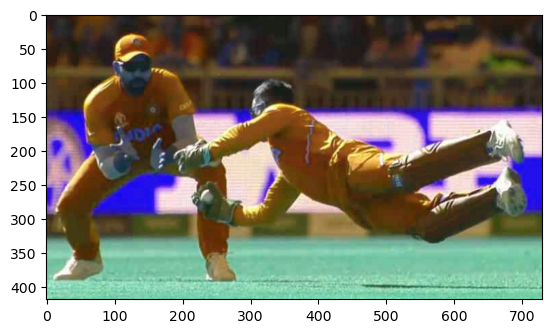

In [26]:
plt.imshow(image)

In [27]:
# Observe image matrix
image

array([[[ 43,  32,  34],
        [ 43,  32,  34],
        [ 43,  32,  34],
        ...,
        [ 52,  31,  34],
        [ 50,  31,  34],
        [ 50,  31,  34]],

       [[ 43,  32,  34],
        [ 43,  32,  34],
        [ 43,  32,  34],
        ...,
        [ 50,  31,  34],
        [ 50,  31,  34],
        [ 50,  31,  34]],

       [[ 43,  32,  34],
        [ 43,  32,  34],
        [ 43,  32,  34],
        ...,
        [ 50,  31,  34],
        [ 50,  31,  34],
        [ 48,  31,  34]],

       ...,

       [[126, 212, 178],
        [149, 235, 201],
        [163, 249, 215],
        ...,
        [119, 217, 175],
        [116, 212, 171],
        [115, 213, 171]],

       [[120, 207, 173],
        [140, 227, 193],
        [149, 236, 202],
        ...,
        [119, 217, 175],
        [118, 216, 174],
        [118, 216, 174]],

       [[116, 203, 169],
        [133, 220, 186],
        [137, 224, 190],
        ...,
        [119, 217, 175],
        [121, 219, 177],
        [121, 219, 177]]

In [28]:
# 3 shows color channels
image.shape

(419, 730, 3)

In [ ]:
# https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html
# https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html
# https://docs.opencv.org/4.x/d8/d01/tutorial_discrete_fourier_transform.html
# https://www.tutorialspoint.com/how-to-find-the-fourier-transform-of-an-image-using-opencv-python

In [29]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray

array([[ 34,  34,  34, ...,  34,  34,  34],
       [ 34,  34,  34, ...,  34,  34,  34],
       [ 34,  34,  34, ...,  34,  34,  34],
       ...,
       [192, 215, 229, ..., 193, 189, 189],
       [187, 207, 216, ..., 193, 192, 192],
       [183, 200, 204, ..., 193, 195, 195]], dtype=uint8)

In [30]:
#Gray images have 1 color channel
image_gray.shape

(419, 730)

In [38]:
# Compute the discrete Fourier Transform of the image
image_gray_DFT = cv2.dft(np.float32(image_gray), flags=cv2.DFT_COMPLEX_OUTPUT)


In [32]:
# Shift the zero-frequency component to the center of the spectrum--->https://help.scilab.org/fftshift#:~:text=If%20x%20results%20of%20an,sometimes%20a%20more%20convenient%20form.&text=y%3Dfftshift(x%2Cn,along%20the%20n%20th%20dimension.
fourier_shift = np.fft.fftshift(image_gray_DFT)

In [46]:
# calculate the magnitude of the Fourier Transform
magnitude_spectrum = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

In [47]:
# Scale the magnitude for display
magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

In [39]:
#cv2.imshow('Fourier Transform', magnitude)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

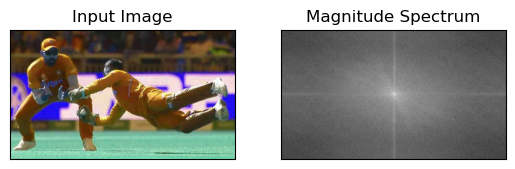

In [48]:
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [49]:
# Display of magnitude_spectrum
magnitude_spectrum

array([[59, 83, 73, ..., 72, 77, 80],
       [65, 66, 73, ..., 63, 70, 70],
       [68, 79, 81, ..., 53, 72, 63],
       ...,
       [68, 63, 72, ..., 64, 81, 79],
       [65, 70, 70, ..., 57, 73, 66],
       [59, 80, 77, ..., 70, 73, 83]], dtype=uint8)

In [ ]:
# In Magnitude spectrum, more whiter region at the center shows that low frequency content is more.
# magnitude_spectrum is your image in the frequency transform and you can now do some operations in frequency domain.
# Go ahead try operations like high pass filtering and reconstruct the image,and then find inverse DFT. 

Distance Transform

In [67]:
coins = cv2.imread('pennies.jpg')B

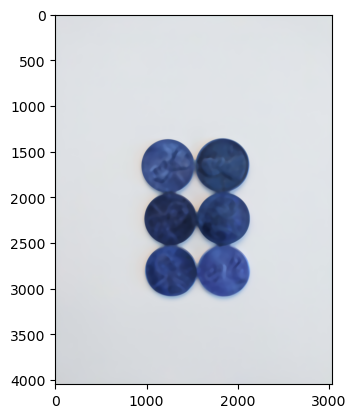

In [74]:
plt.imshow(coins)

In [75]:
# We can easily tell with our eyes that there are 6 coins, but computer vision considers this a blob (a group of connected pixels or regions in a binary image that shares a common property)
# We need to separate the coins

In [85]:
coins = cv2.medianBlur(coins,35)
# 35 is size of the kernel. You can change this to observe the effect

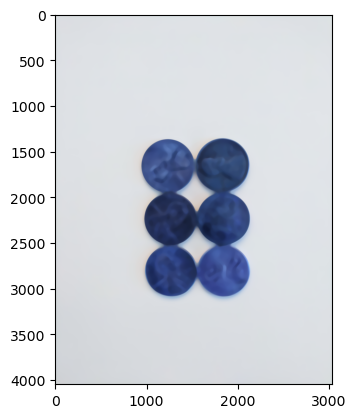

In [86]:
plt.imshow(coins)

In [97]:
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

In [98]:
ret, thresh =cv2.threshold(coins_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

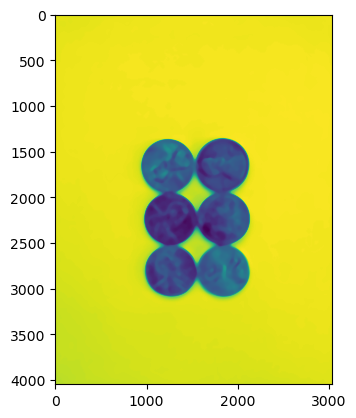

In [99]:
plt.imshow(coins_gray)

In [100]:
#Using a seeding and region-growing technique, a segmented pixel set is created by initially 
# selecting one or more pixels from the image (called the seed pixels). Let's use Distance transform.

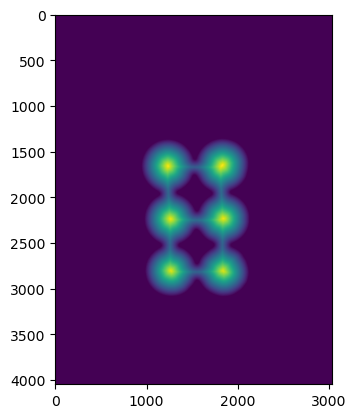

In [102]:
plt.imshow(dist_transform)

In [113]:
#Notice how bright the centers are distinguishing from the zero values(background)
ret,complete_foreground = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

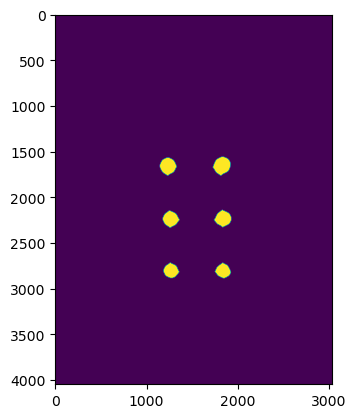

In [115]:
plt.imshow(complete_foreground)

In [1]:
#We have further applied thresholding to completely segmement the coins. Now the computer
#can see each coin independent of other coins as grouped from the default image.

Hough Transform

In [12]:
# Read image 
lanes = cv2.imread('highway.PNG', cv2.IMREAD_COLOR) # road.png is the filename

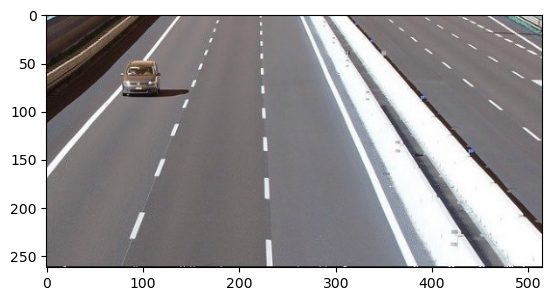

In [13]:
plt.imshow(lanes, cmap='gray') 

In [14]:
# Convert the image to gray-scale
lanes_gray = cv2.cvtColor(lanes, cv2.COLOR_BGR2GRAY)

In [15]:
# Find the edges in the image using canny detector
lanes_edges = cv2.Canny(lanes_gray, 50, 200)

In [18]:
# Detect points that form a line
lanes_lines = cv2.HoughLinesP(lanes_edges, 1, np.pi/180, 150, 10, 250)

In [25]:
# Draw lines on the image. I had a error from this point and time didn't give me a chance to correct it. 
#I am still working on it, but I would be more than happy to see for you trying
